### Convolution Neural Network

To start Kears with Theano backend please run the following command while starting jupter notebook.

KERAS_BACKEND=theano jupyter notebook

In [1]:
import keras
keras.backend.backend()
keras.backend.image_dim_ordering()

# Ensure to set the image dimension appropriately
K = keras.backend.backend()
if K=='tensorflow':
    keras.backend.set_image_dim_ordering('tf')
else:
    keras.backend.set_image_dim_ordering('th')

Using Theano backend.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.utils.visualize_util import plot
from keras.preprocessing import sequence

from keras import backend as K
from keras.utils.visualize_util import plot
from IPython.display import SVG, display
from keras.utils.visualize_util import model_to_dot, plot

/home/manohar/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 5

if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)
    
# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


In [4]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

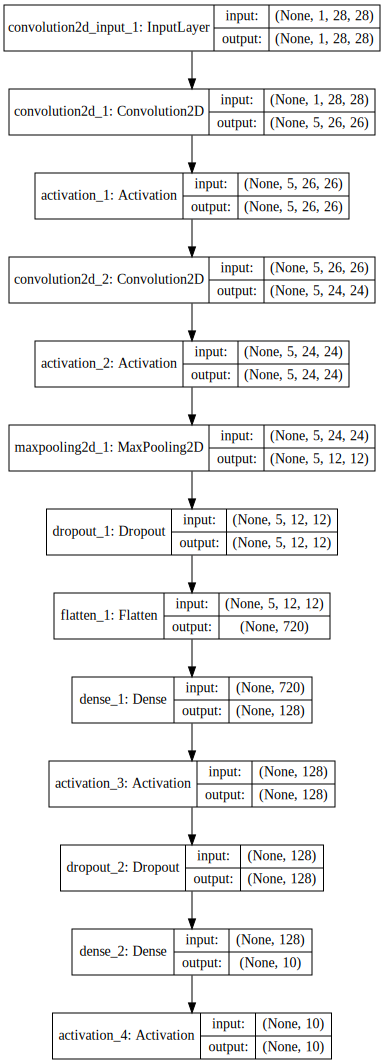

In [5]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 5, 26, 26)     50          convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 5, 26, 26)     0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 5, 24, 24)     230         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 5, 24, 24)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [7]:
model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=256, verbose=2,  validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
24s - loss: 0.9369 - acc: 0.6947 - val_loss: 0.2509 - val_acc: 0.9260
Epoch 2/5
27s - loss: 0.3576 - acc: 0.8901 - val_loss: 0.1592 - val_acc: 0.9548
Epoch 3/5
27s - loss: 0.2714 - acc: 0.9173 - val_loss: 0.1254 - val_acc: 0.9629
Epoch 4/5
25s - loss: 0.2271 - acc: 0.9319 - val_loss: 0.1084 - val_acc: 0.9690
Epoch 5/5
25s - loss: 0.2070 - acc: 0.9376 - val_loss: 0.0967 - val_acc: 0.9722


### Visualization of layers

In [8]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')

### Input layer (original image)

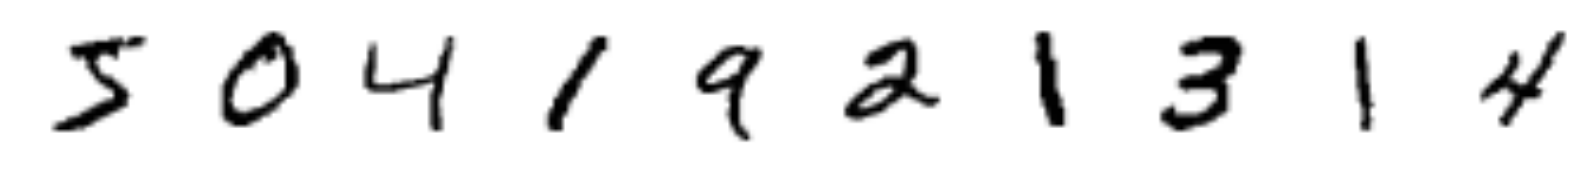

In [9]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

### First layer with 5 filters

first layer shape:  (10, 5, 26, 26)


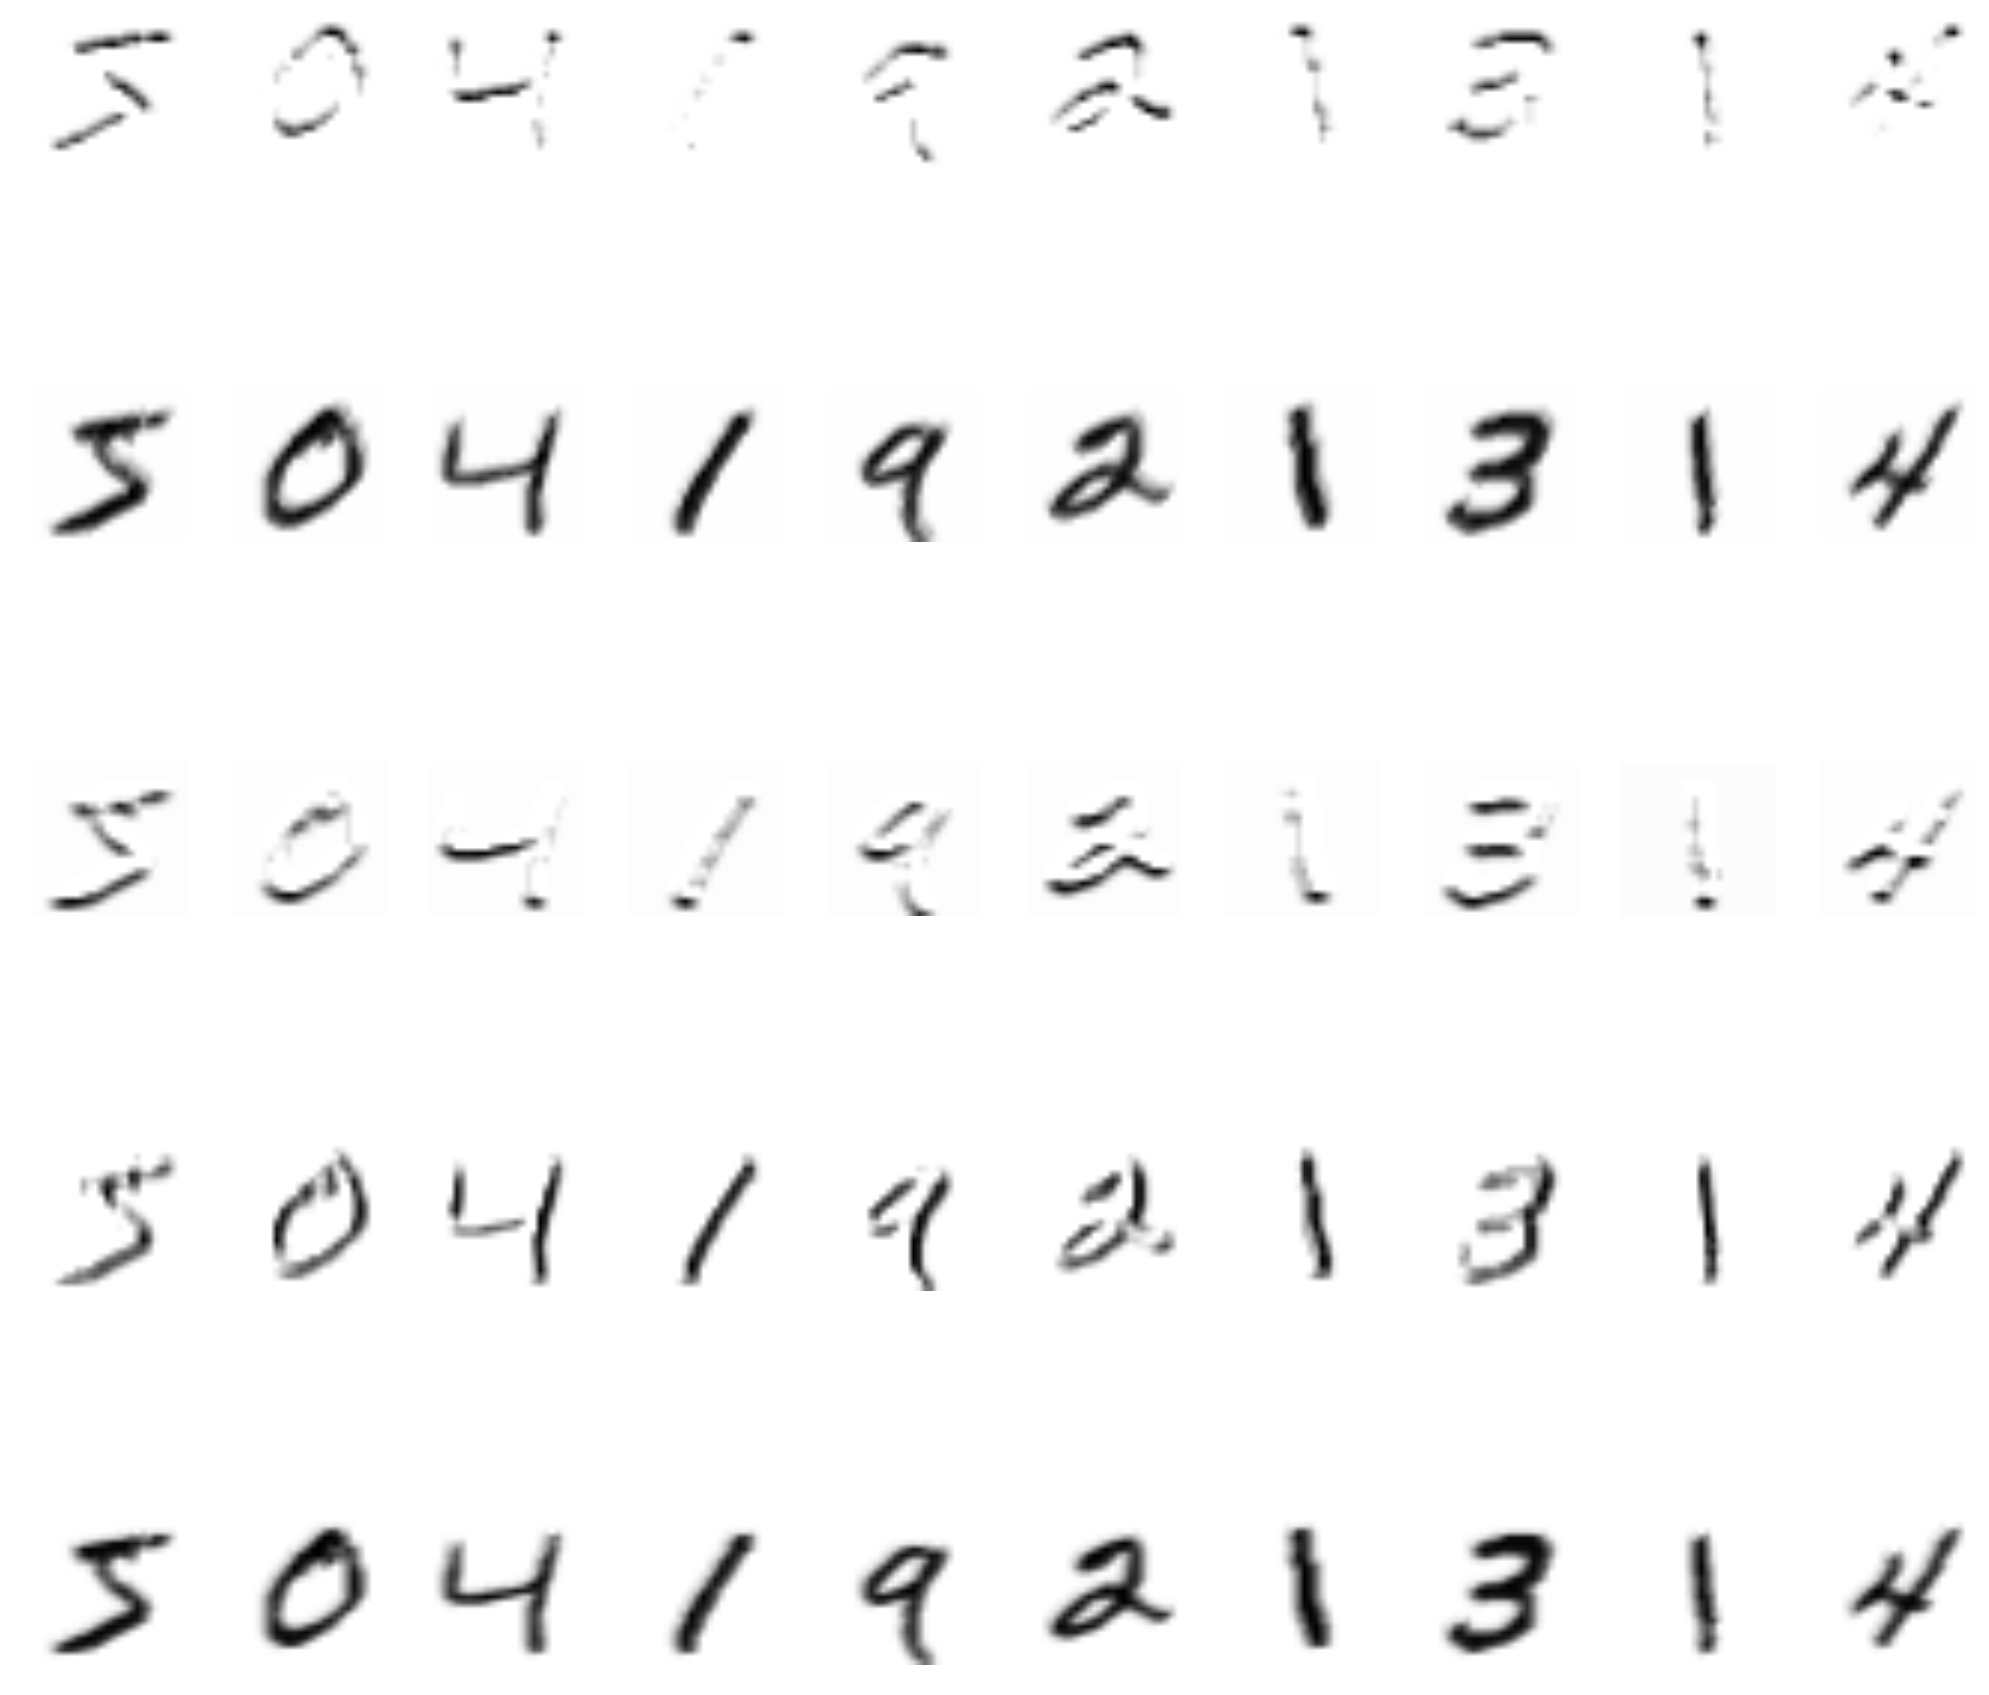

In [10]:
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print 'first layer shape: ', first_layer.shape

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()        
plt.show()

### Second layer with 5 filters

second layer shape:  (10, 5, 24, 24)


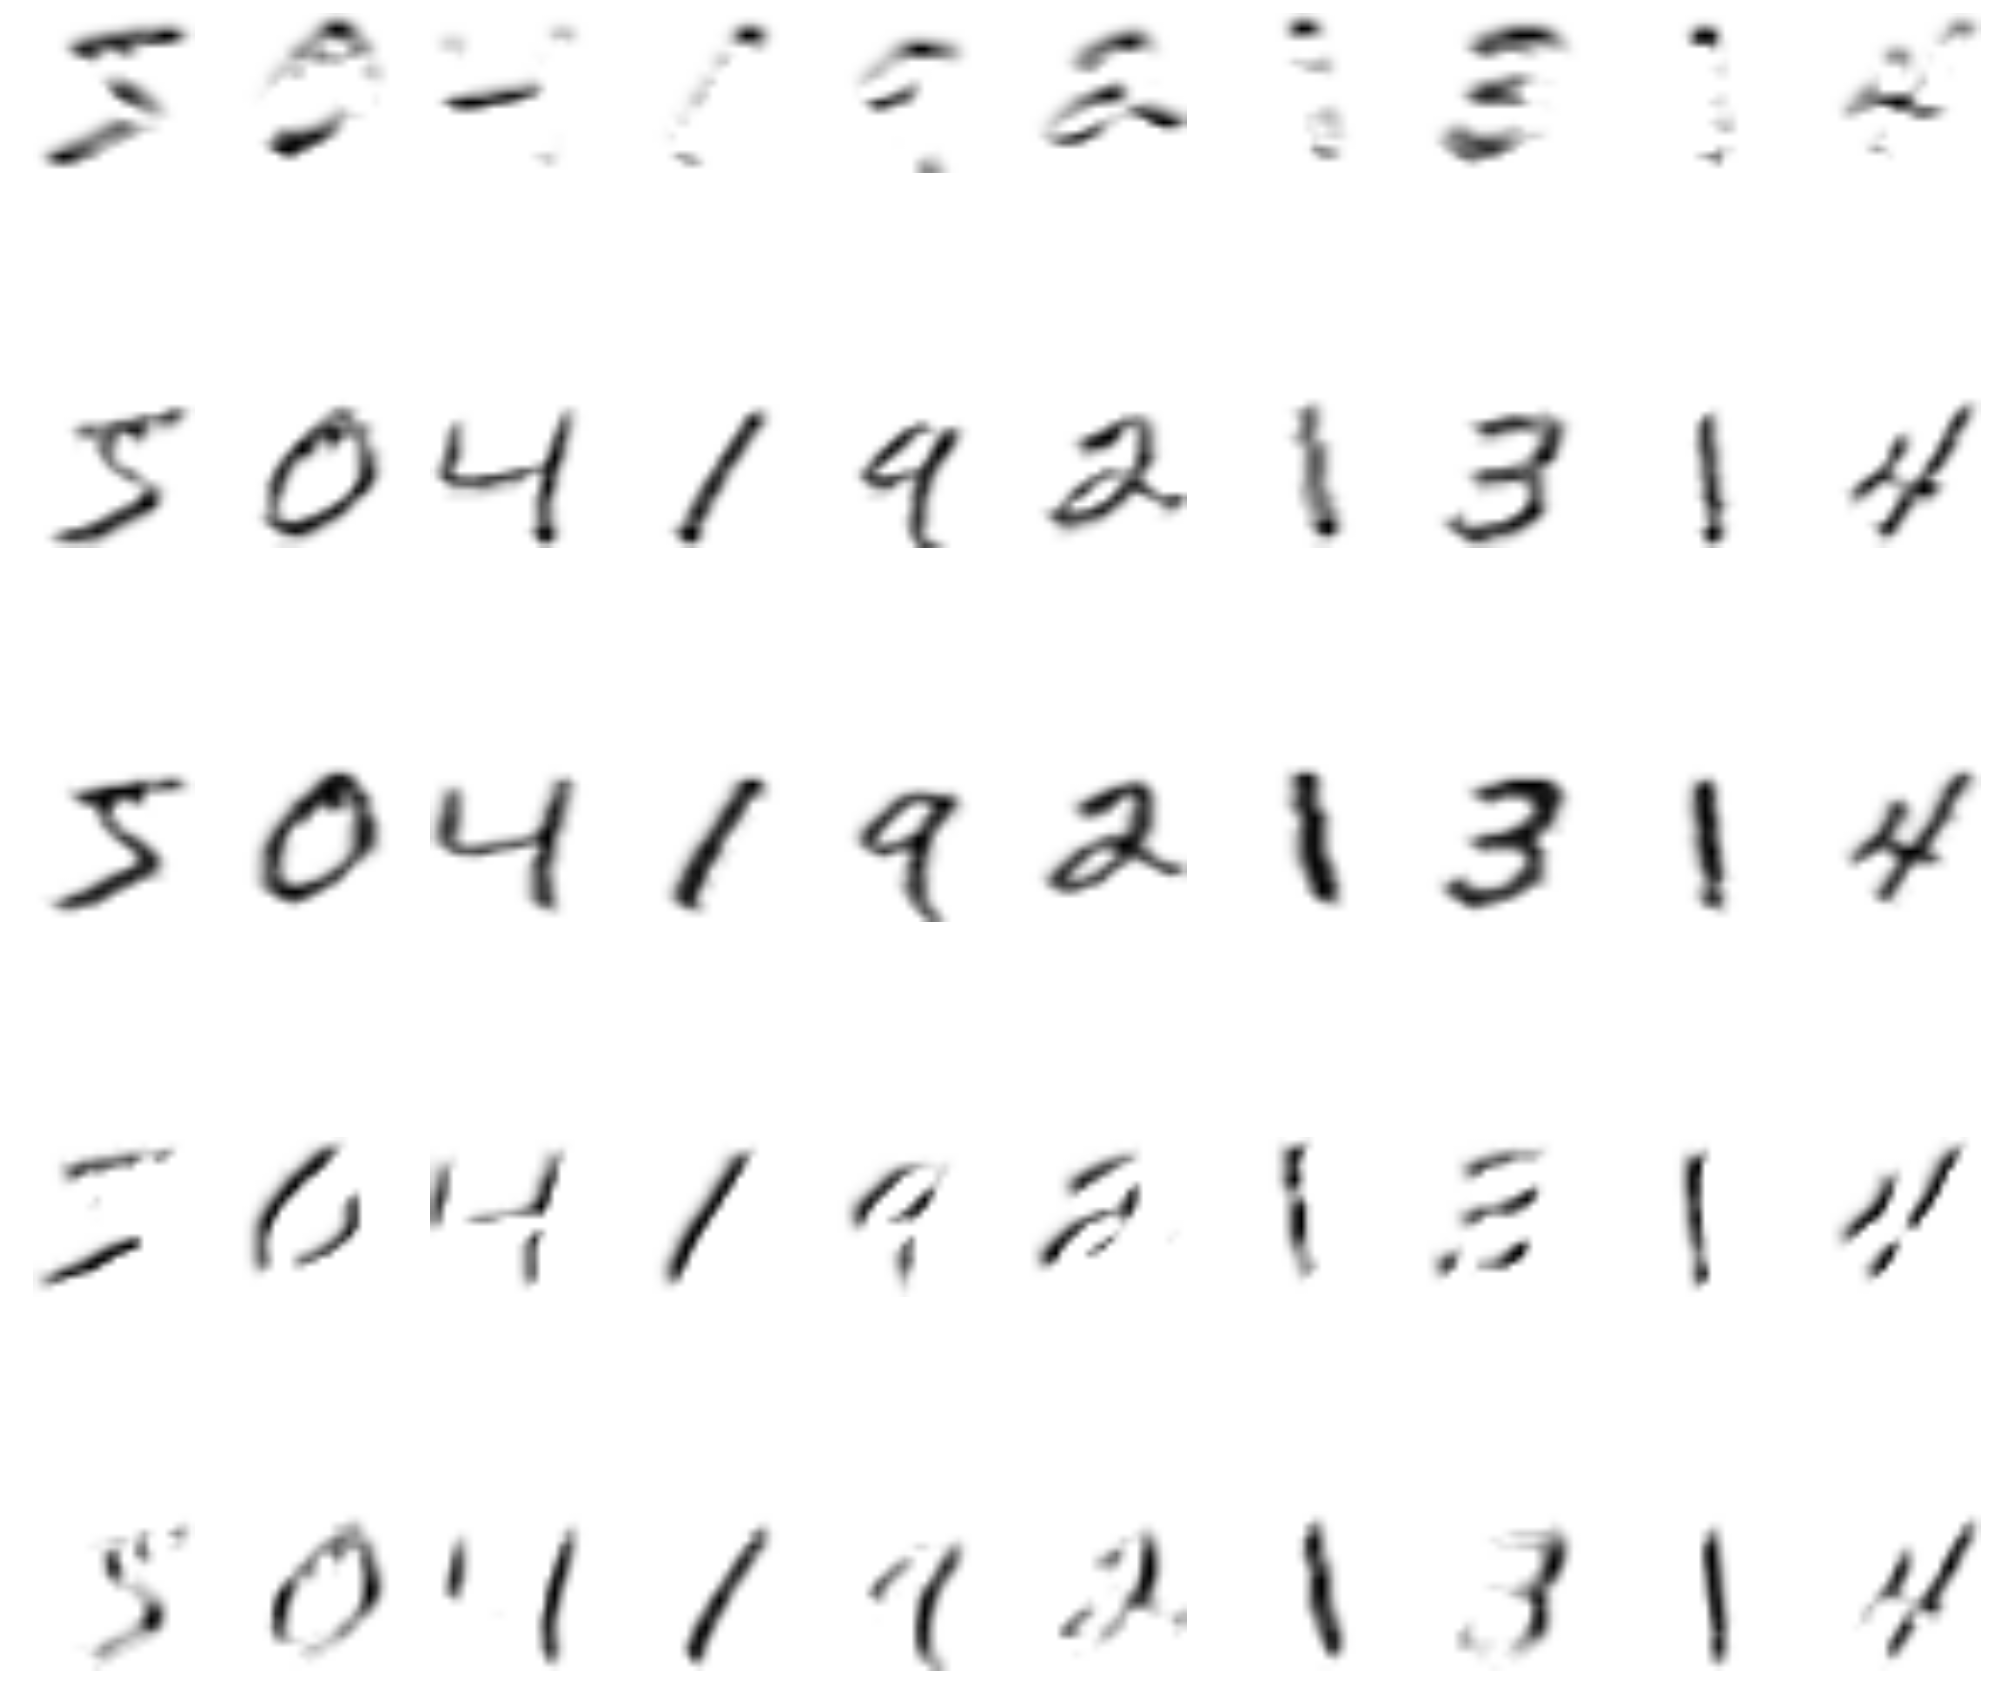

In [11]:
get_second_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
second_layer = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print 'second layer shape: ', second_layer.shape

for img_index, filters in enumerate(second_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()        
plt.show()

### Third layer with 5 filters

thrid layer shape:  (10, 5, 12, 12)


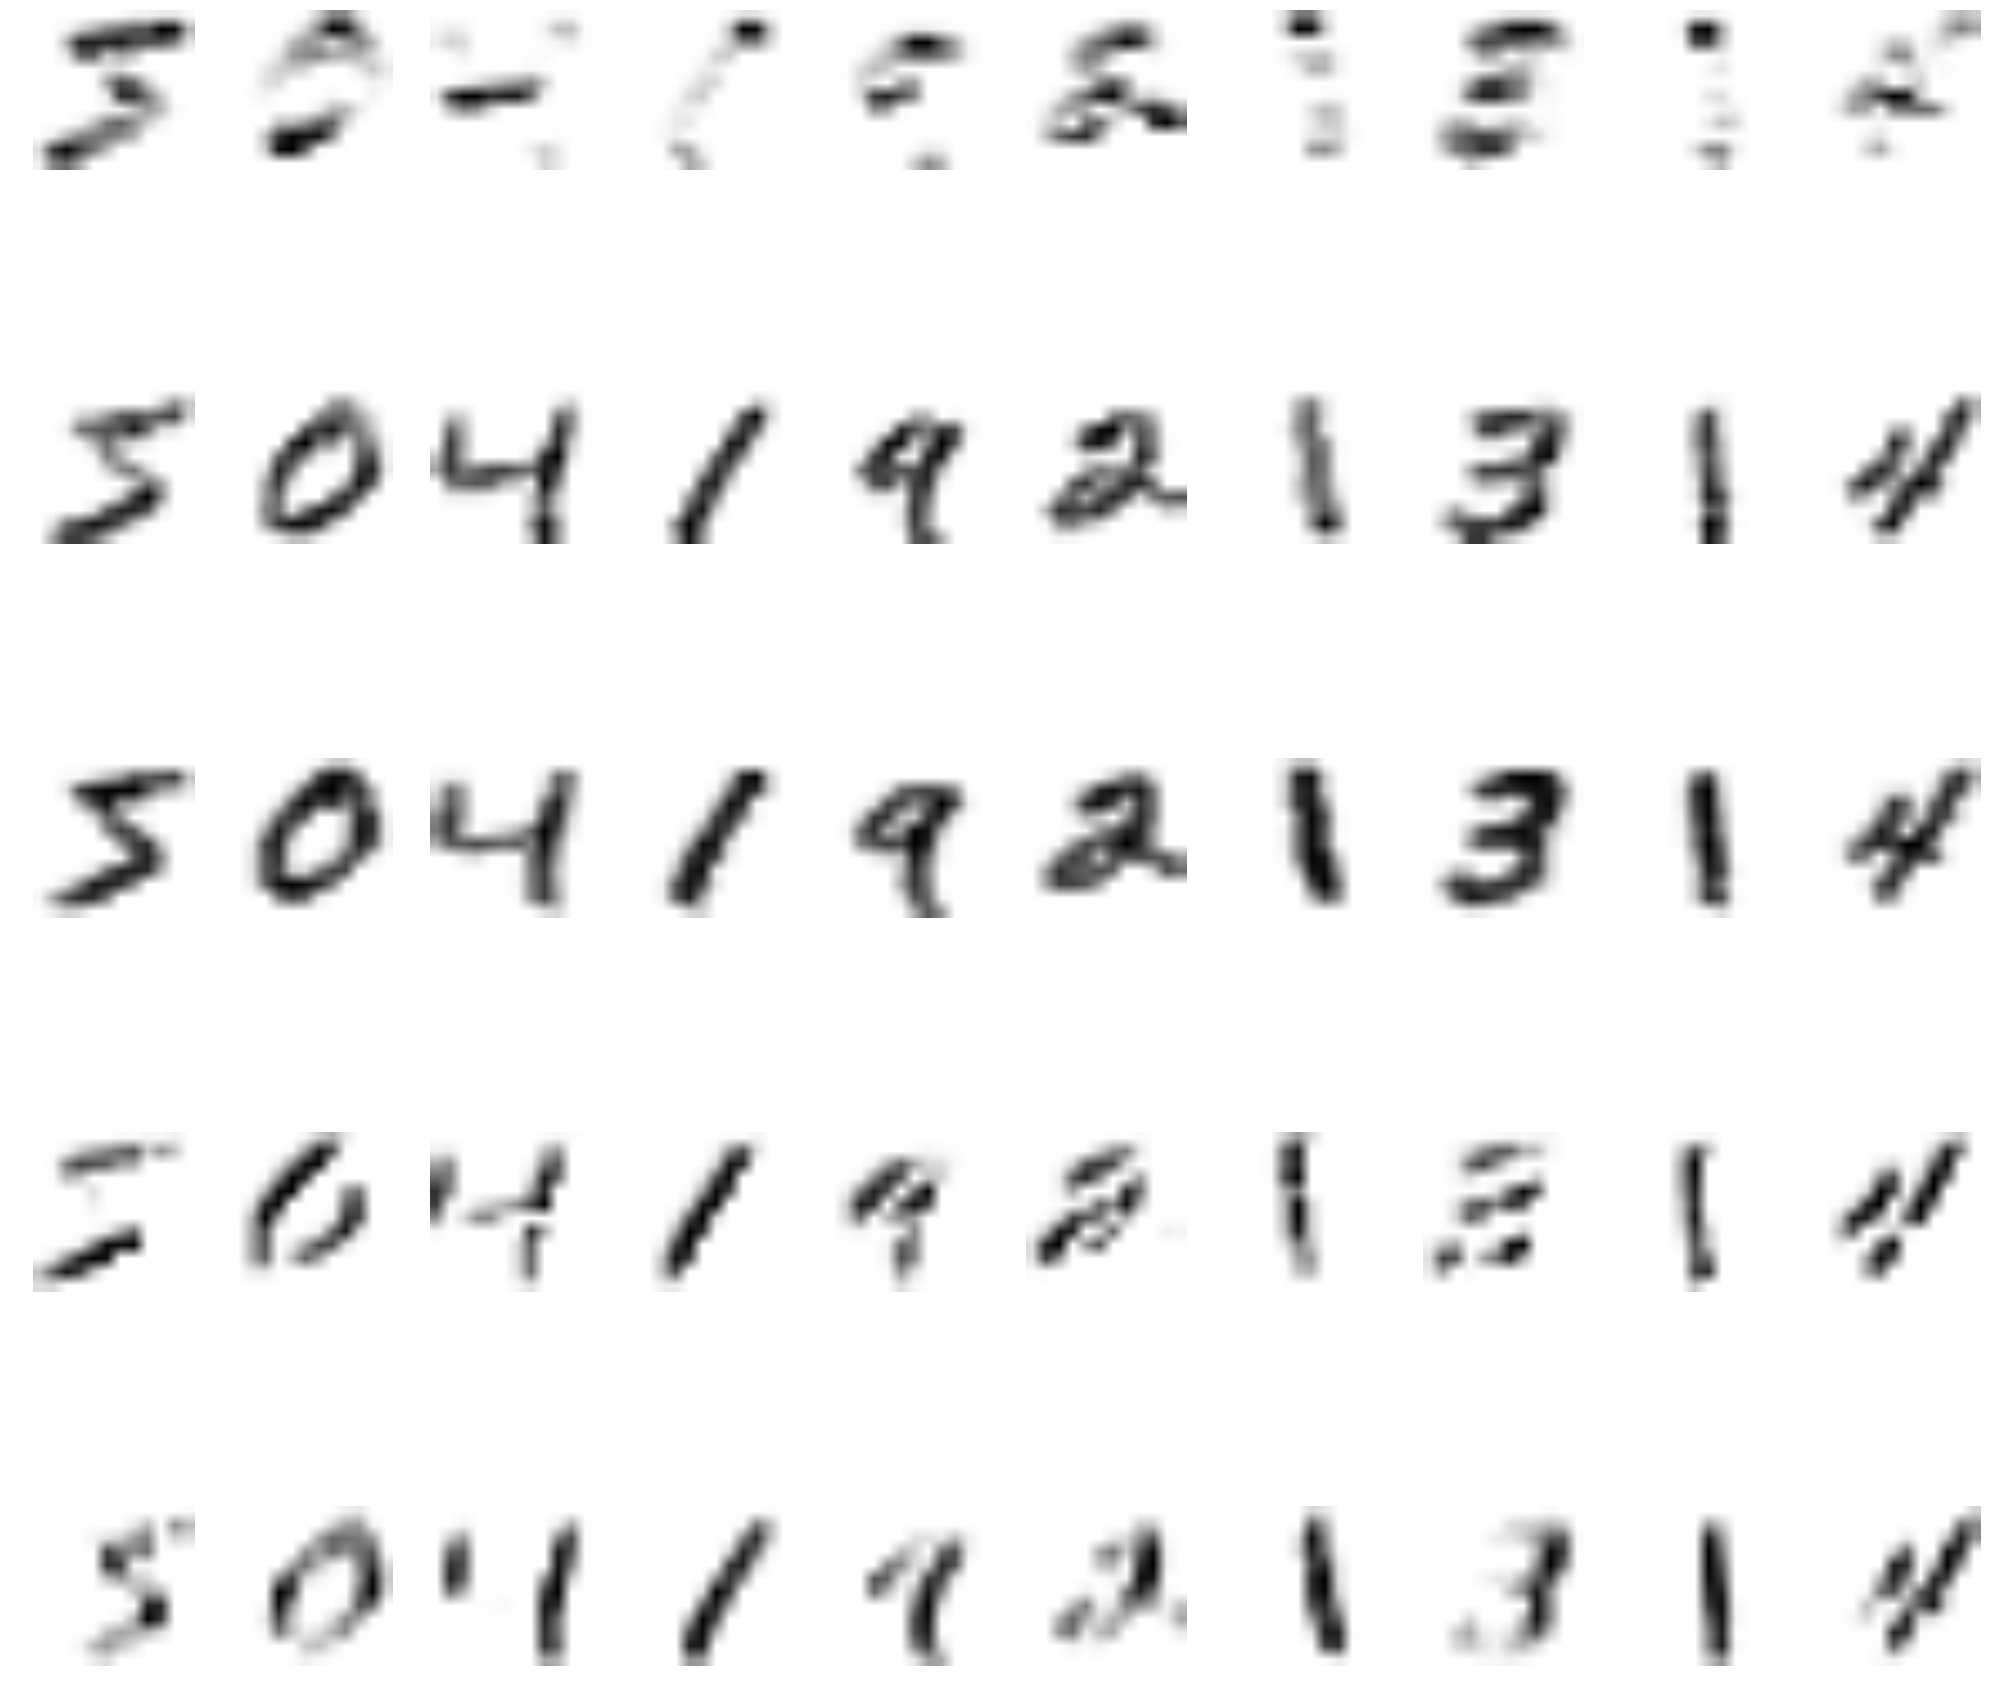

In [12]:
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
third_layers = get_3rd_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print 'thrid layer shape: ', third_layers.shape

for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()
plt.show()